In [1]:
from utils.markov_chain import SimpleSymmetricRandomWalk, get_samples_from_mean_estimator_for_inverse_square
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Prepare style for the plots
sns.set_style("whitegrid")
sns.set_context("paper")

In [3]:
# Random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Variables
num_samples_true_dist = 10**4

true_mean = (np.pi**2)/3

In [5]:
estimator_values = {}
for n_steps in [10**2, 10**3, 10**4, 10**5, 5*10**5, 10**6]:
    random_seed+=1
    val = get_samples_from_mean_estimator_for_inverse_square(num_samples=num_samples_true_dist, markov_chain_class=SimpleSymmetricRandomWalk, create_kargs={"step_n": n_steps, "name":"simple_rw"}, true_mean=true_mean, atom_state=0, random_seed=random_seed)
    estimator_values[n_steps] = val

/Users/carlos/work/phd-code/boostrap_markov/utils/markov_chain/base.py:462: RuntimeWarning: divide by zero encountered in power
  return np.sum(np.where(block == 0, 0, np.power(block, -2)))
/Users/carlos/work/phd-code/boostrap_markov/utils/markov_chain/base.py:462: RuntimeWarning: divide by zero encountered in power
  return np.sum(np.where(block == 0, 0, np.power(block, -2)))
/Users/carlos/.virtualenvs/bootstrap_markov/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/carlos/.virtualenvs/bootstrap_markov/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/carlos/.virtualenvs/bootstrap_markov/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/User

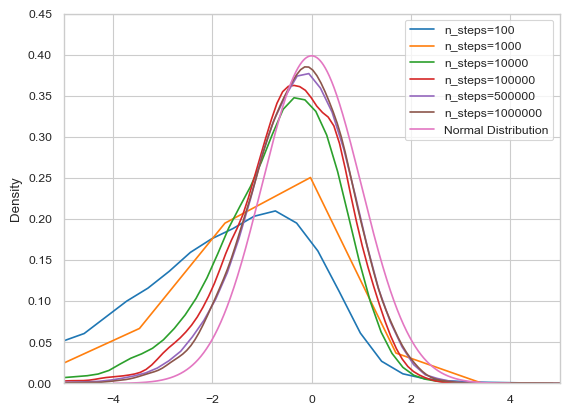

In [6]:
for k, v in estimator_values.items():
    sns.kdeplot(data=v, label=f"n_steps={k}")
# Define the mean and standard deviation for the normal distribution
mean = 0
std_dev = 1

# Generate x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the PDF of the normal distribution
pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Plot the PDF of the normal distribution
plt.plot(x, pdf, label="Normal Distribution")
plt.xlim(-5, 5)
plt.ylim(0, 0.45)
plt.legend()
plt.show()


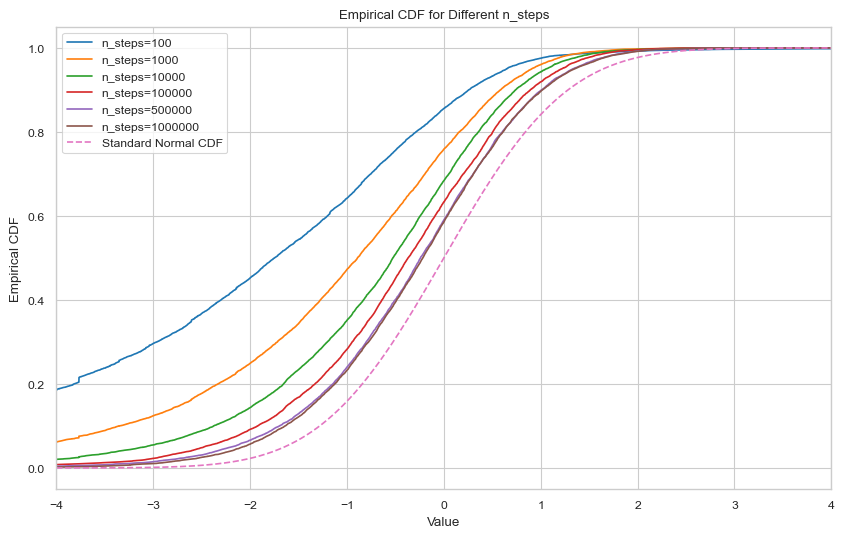

In [8]:

# Function to compute empirical CDF
def empirical_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# Plot the empirical CDF for each value in estimator_values
plt.figure(figsize=(10, 6))
for n_steps, values in estimator_values.items():
    sorted_data, cdf = empirical_cdf(values)
    plt.plot(sorted_data, cdf, label=f"n_steps={n_steps}")

# Plot the CDF of a standard normal distribution
from scipy.stats import norm

x = np.linspace(-4, 4, 1000)
cdf_standard_normal = norm.cdf(x)
plt.plot(x, cdf_standard_normal, label="Standard Normal CDF", linestyle='--')

plt.xlabel('Value')
plt.xlim(-4,4)
plt.ylabel('Empirical CDF')
plt.title('Empirical CDF for Different n_steps')
plt.legend()
plt.grid(True)
plt.show()
